# C - Network Creation and Background

In this notebook, we explore basic metrics of our network, namely the number of nodes and edges, create the giant connected component we will be working with for some parts of our analysis, and create the visualization of the frequencies of goal categories used in our first figure. For this, we use the network created in earlier parts.

In [1]:
# import all relevant packages
import networkx as nx
import matplotlib.pyplot as plt
import random
import requests
import pickle
from collections import Counter
import warnings
import textwrap
import seaborn as sns

### Importing & Inspecting the Network

We import the network from GitHub to look at basic metrics to include in our network creation section.

In [2]:
url = "https://raw.githubusercontent.com/nicosrp/The-Architecture-of-Aspiration-A-Network-Perspective-on-Human-Goals/main/Networks/dayzero_network.pkl"
response = requests.get(url)
response.raise_for_status()

G = pickle.loads(response.content)

This network includes attributes relating to the topic and location classification created earlier in addition to the ones extracted from the data.

In [3]:
attr_keys = {k for _, attrs in G.nodes(data=True) for k in attrs}
print(attr_keys)

{'tags', 'other_map_location', 'comments', 'wants_to_do', 'country', 'title', 'have_done', 'included_by_our_users', 'city', 'category', 'description'}


In [4]:
len(G.nodes())

2890

In [5]:
len(G.edges())

219130

To get a better idea of what our node attributes look like, we inspect five random nodes.

In [6]:
# pick 5 random nodes
sample_nodes = random.sample(list(G.nodes()), 5)

for n in sample_nodes:
    print(f"Node: {n}")
    print(G.nodes[n])
    print("---")

Node: JzqVaD8e
{'title': 'Visit Fallingwater', 'description': "Located in southwestern Pennsylvania, Fallingwater is a renowned architectural masterpiece designed by Frank Lloyd Wright. This iconic house, built over a waterfall, is a must-visit destination for architecture enthusiasts and nature lovers alike. Immerse yourself in the beauty of the surrounding forest as you explore the house's unique design, including cantilevered balconies and seamless integration with the natural environment. Discover the history behind this extraordinary structure through guided tours, marvel at its innovative features, and gain a deeper appreciation for Wright's genius. A visit to Fallingwater promises an unforgettable experience that combines art, nature, and the timeless allure of exceptional design.", 'wants_to_do': 370, 'have_done': 46, 'comments': ['We have plans to visit this month.'], 'tags': ['Travel', 'Nature', 'Tourism', 'Architecture', 'Hiking', 'Art', 'Conservation', 'Tourist Attraction',

### Creation of the Largest Connected Component

To extract the largest connected component from our network, we create a list of all components, choose the largest one based on size, and create a new graph based on this.

In [7]:
# extracting the largest connected component

components = list(nx.connected_components(G))
largest_cc = max(components, key=len)
Gcc = G.subgraph(largest_cc).copy()

In [8]:
len(Gcc.nodes())

2860

The largest connected component has 2860 nodes, 30 less than our original network.

In [9]:
len(Gcc.edges())

219126

The largest connected component has 219126 edges, 4 less than our original network. The fact that this number is small compared to the reduction in nodes is due to isolated nodes contained in our original network:

In [10]:
len(list(nx.isolates(G)))

25

### Creating a Visualization of the Distribution of Categories Across the Nodes in Our Network

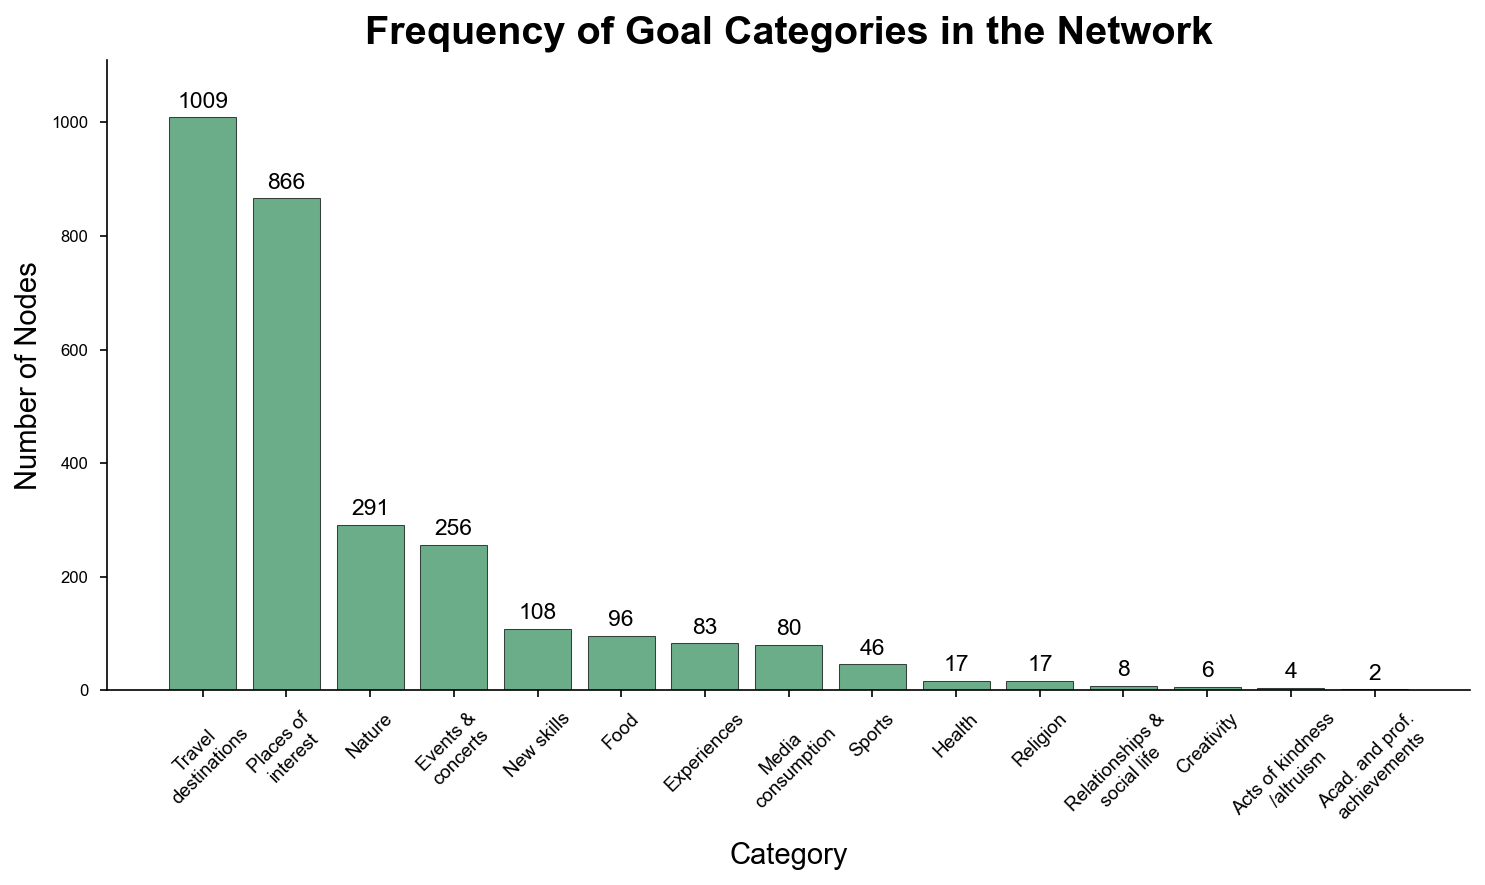

In [11]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Extract categories
categories = [attrs.get("category") for _, attrs in G.nodes(data=True) if "category" in attrs]

# Count frequencies and sort
counts = Counter(categories)
sorted_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_items)

# Wrap labels (apply compacting for very long category names)
def compact_label(label):
    """Abbreviate long category names for better visualization"""
    # Specific abbreviations for long category names
    if label == 'Academic and professional achievements':
        return 'Acad. and prof. achievements'
    else:
        return label

wrapped_labels = ['\n'.join(textwrap.wrap(str(compact_label(label)), width=16)) for label in labels]

# Apply scientific publication style and sizing
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Arial'],  # e.g. 'Arial', 'Helvetica', etc.
    'mathtext.fontset': 'stix',         # math text matches serif font family
    'font.size': 10,
    'axes.labelsize': 9,
    'axes.titlesize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 9,
    'figure.dpi': 150,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 1.5
})

# Plot (single-color bars consistent with the scientific theme)
fig, ax = plt.subplots(figsize=(10, 6))
bar_color = '#2E8B57'
bars = ax.bar(range(len(values)), values, color=bar_color, edgecolor='black', linewidth=0.5, alpha=0.7)

# Add counts above bars
for bar, value in zip(bars, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + max(values) * 0.01,
        str(value),
        ha='center',
        va='bottom',
        color='black',
        fontsize=11
    )

# Tick labels
ax.set_xticks(range(len(values)))
ax.set_xticklabels(wrapped_labels, rotation=45, ha='center', fontsize=9, color='black')

# Labels and title with matching sizes
ax.set_ylabel("Number of Nodes", fontsize=14, labelpad=4)
ax.set_xlabel("Category", fontsize=14, labelpad=4)
ax.set_title("Frequency of Goal Categories in the Network", fontsize=19, pad=8, fontweight='bold')
ax.set_ylim(0, max(values) * 1.1)

# Clean up spines (publication look)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Reset style to default
plt.style.use('default')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

To give a better overview over how many nodes belong into each category, we created a bar chart showing the number of nodes belonging into each category. This visual will be used in figure 1 in the paper.